# **Regressão Logística**

Conforme falamos na última aula, a regressão logística é um modelo linear que pode utilizar as características de entrada ($X$) e estimar a *probabilidade* daquele conjunto de características pertecer a cada uma das classes.

Vamos lembrar da equação que define a regressão logística:

$$p(Y=1|X) = \frac{1}{1+e^{-(a_0+\sum_{i=1}^{m}a_ix_i)}}$$

Na equação acima:

- $a_0$ - é conhecido como *intercepto* e representa o valor da probabilidade daquele conjunto de características pertencer à classe 1, quando todos os outros valores $x_i = 0$. Pode ou não ter significado físico.
- $x_i$ são os valores das características que queremos modelar.
- $a_i$ são as *inclinações* ou *coeficientes angulares*. Representam o efeito médio que cada variável $x_i$ tem sobre a probabilidade. Voltaremos a eles posteriormente.

O termo $k = a_0 + \sum_{i=1}^{m} a_i x_i$ determina a reta ou o hiperplano que vai separar as classes.

Nativamente, a regressão logística funciona para classificação de problemas binários (0 / 1). Porém, com algumas modificações (que falaremos lá em redes neurais), ela pode ser adaptada para problemas multi-classes.

Vamos começar a resolver nosso problema de crédito bancário (Fonte: https://www.kaggle.com/datasets/mpwolke/cusersmarildownloadsgermancsv)

In [29]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ignorar warnings (opcional)
warnings.filterwarnings('ignore')

In [2]:
# conectar o colab ao Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# lendo os dados
PATH = '/content/drive/MyDrive/Bootcamp_DataScience/AlgoritmosInteligenciaArtificialClassificacao/datasets/german_credit.csv'
data = pd.read_csv(PATH)
data.head()

Creditability  Account Balance  Duration of Credit (month)  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment Status of Previous Credit  Purpose  Credit Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value Savings/Stocks  Length of current employment  Instalment per cent  \
0                     1                             2                    4   
1                     1                             3                    2   
2                     2                             4                    2   
3                     1                             3                    3   
4                     1                             3                    4   

   Sex & Marital Status  ...  Duration in Current address  \
0                     2  ...                            4   
1                     3  ...                            2   
2                     2  ...                            4   
3                     3  ...                            2   
4                     3  ...                            4   

   Most valuable available asset  Age (years)  Concurrent Credits  \
0                              2           21                   3   
1                              1           36                   3   
2                              1           23                   3   
3                              1           39                   3   
4                              2           38                   1   

   Type of apartment  No of Credits at this Bank  Occupation  \
0                  1                           1           3   
1                  1                           2           3   
2                  1                           1           2   
3                  1                           2           2   
4                  2                           2           2   

   No of dependents  Telephone  Foreign Worker  
0                 1          1               1  
1                 2          1               1  
2                 1          1               1  
3                 2          1               2  
4                 1          1               2  

[5 rows x 21 columns]

In [4]:
# analisar a tipagem dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [5]:
# analisar dados nulos - forma 2
data.isna().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

<Axes: >

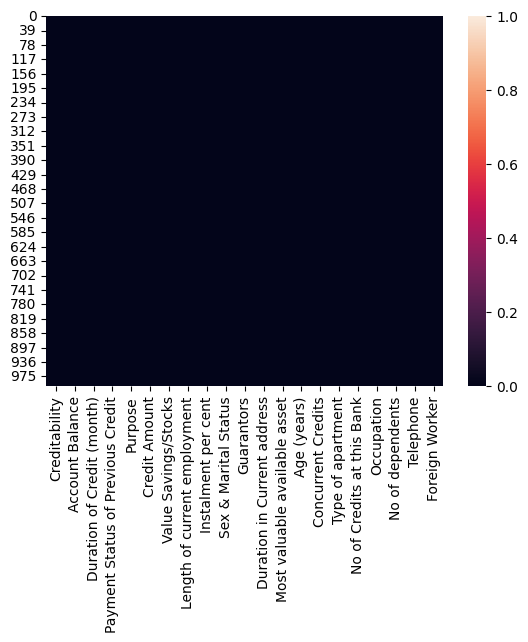

In [8]:
# analise de dados nulos - forma 3
sns.heatmap(data.isna(), vmin=0, vmax=1)

In [10]:
# adicionar uma coluna nula
data['test'] = np.nan

<Axes: >

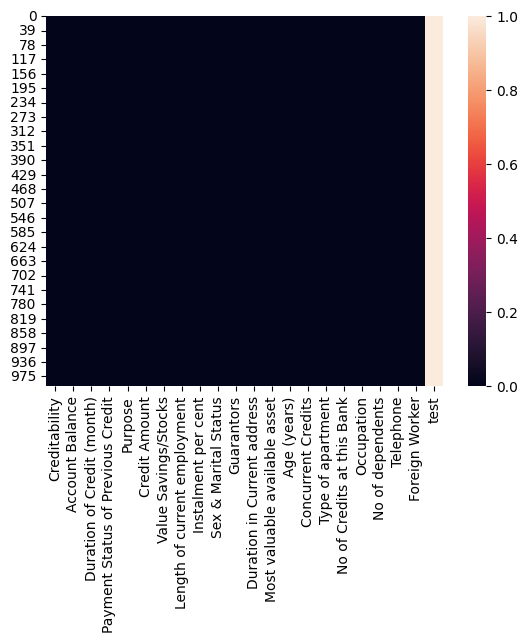

In [11]:
# analise de dados nulos - forma 3
sns.heatmap(data.isna(), vmin=0, vmax=1)

In [14]:
# eliminando a coluna test
data.drop(columns=['test'], inplace=True)
# data = data.drop(columns=['test'])

In [15]:
# (opcional) modificar os nomes das colunas
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data.head(1)

creditability  account_balance  duration_of_credit_month  \
0              1                1                        18   

   payment_status_of_previous_credit  purpose  credit_amount  \
0                                  4        2           1049   

   value_savings/stocks  length_of_current_employment  instalment_per_cent  \
0                     1                             2                    4   

   sex_&_marital_status  ...  duration_in_current_address  \
0                     2  ...                            4   

   most_valuable_available_asset  age_years  concurrent_credits  \
0                              2         21                   3   

   type_of_apartment  no_of_credits_at_this_bank  occupation  \
0                  1                           1           3   

   no_of_dependents  telephone  foreign_worker  
0                 1          1               1  

[1 rows x 21 columns]

In [16]:
# verificar o balanceamento das classes
data['creditability'].value_counts(normalize=True)

creditability
1    0.7
0    0.3
Name: proportion, dtype: float64

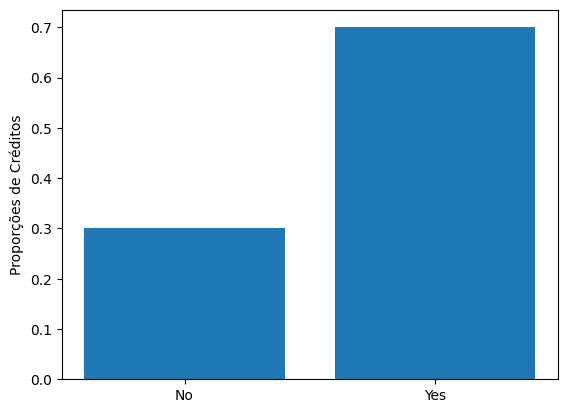

In [18]:
# outra forma de ver o balanceamento de classes
proportions = data['creditability'].value_counts(normalize=True)

plt.bar(x=proportions.index, height=proportions.values)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel('Proporções de Créditos')
plt.show()

In [19]:
# para iniciar - apenas variáveis numéricas (reais)
data = data[['creditability', 'credit_amount', 'age_years', 'duration_of_credit_month',
             'concurrent_credits', 'length_of_current_employment', 'no_of_dependents']]
data.head()

creditability  credit_amount  age_years  duration_of_credit_month  \
0              1           1049         21                        18   
1              1           2799         36                         9   
2              1            841         23                        12   
3              1           2122         39                        12   
4              1           2171         38                        12   

   concurrent_credits  length_of_current_employment  no_of_dependents  
0                   3                             2                 1  
1                   3                             3                 2  
2                   3                             4                 1  
3                   3                             3                 2  
4                   1                             3                 1

In [20]:
# verificando infos dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   creditability                 1000 non-null   int64
 1   credit_amount                 1000 non-null   int64
 2   age_years                     1000 non-null   int64
 3   duration_of_credit_month      1000 non-null   int64
 4   concurrent_credits            1000 non-null   int64
 5   length_of_current_employment  1000 non-null   int64
 6   no_of_dependents              1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [21]:
# outra forma de verificar tamanho dos dados
data.shape

(1000, 7)

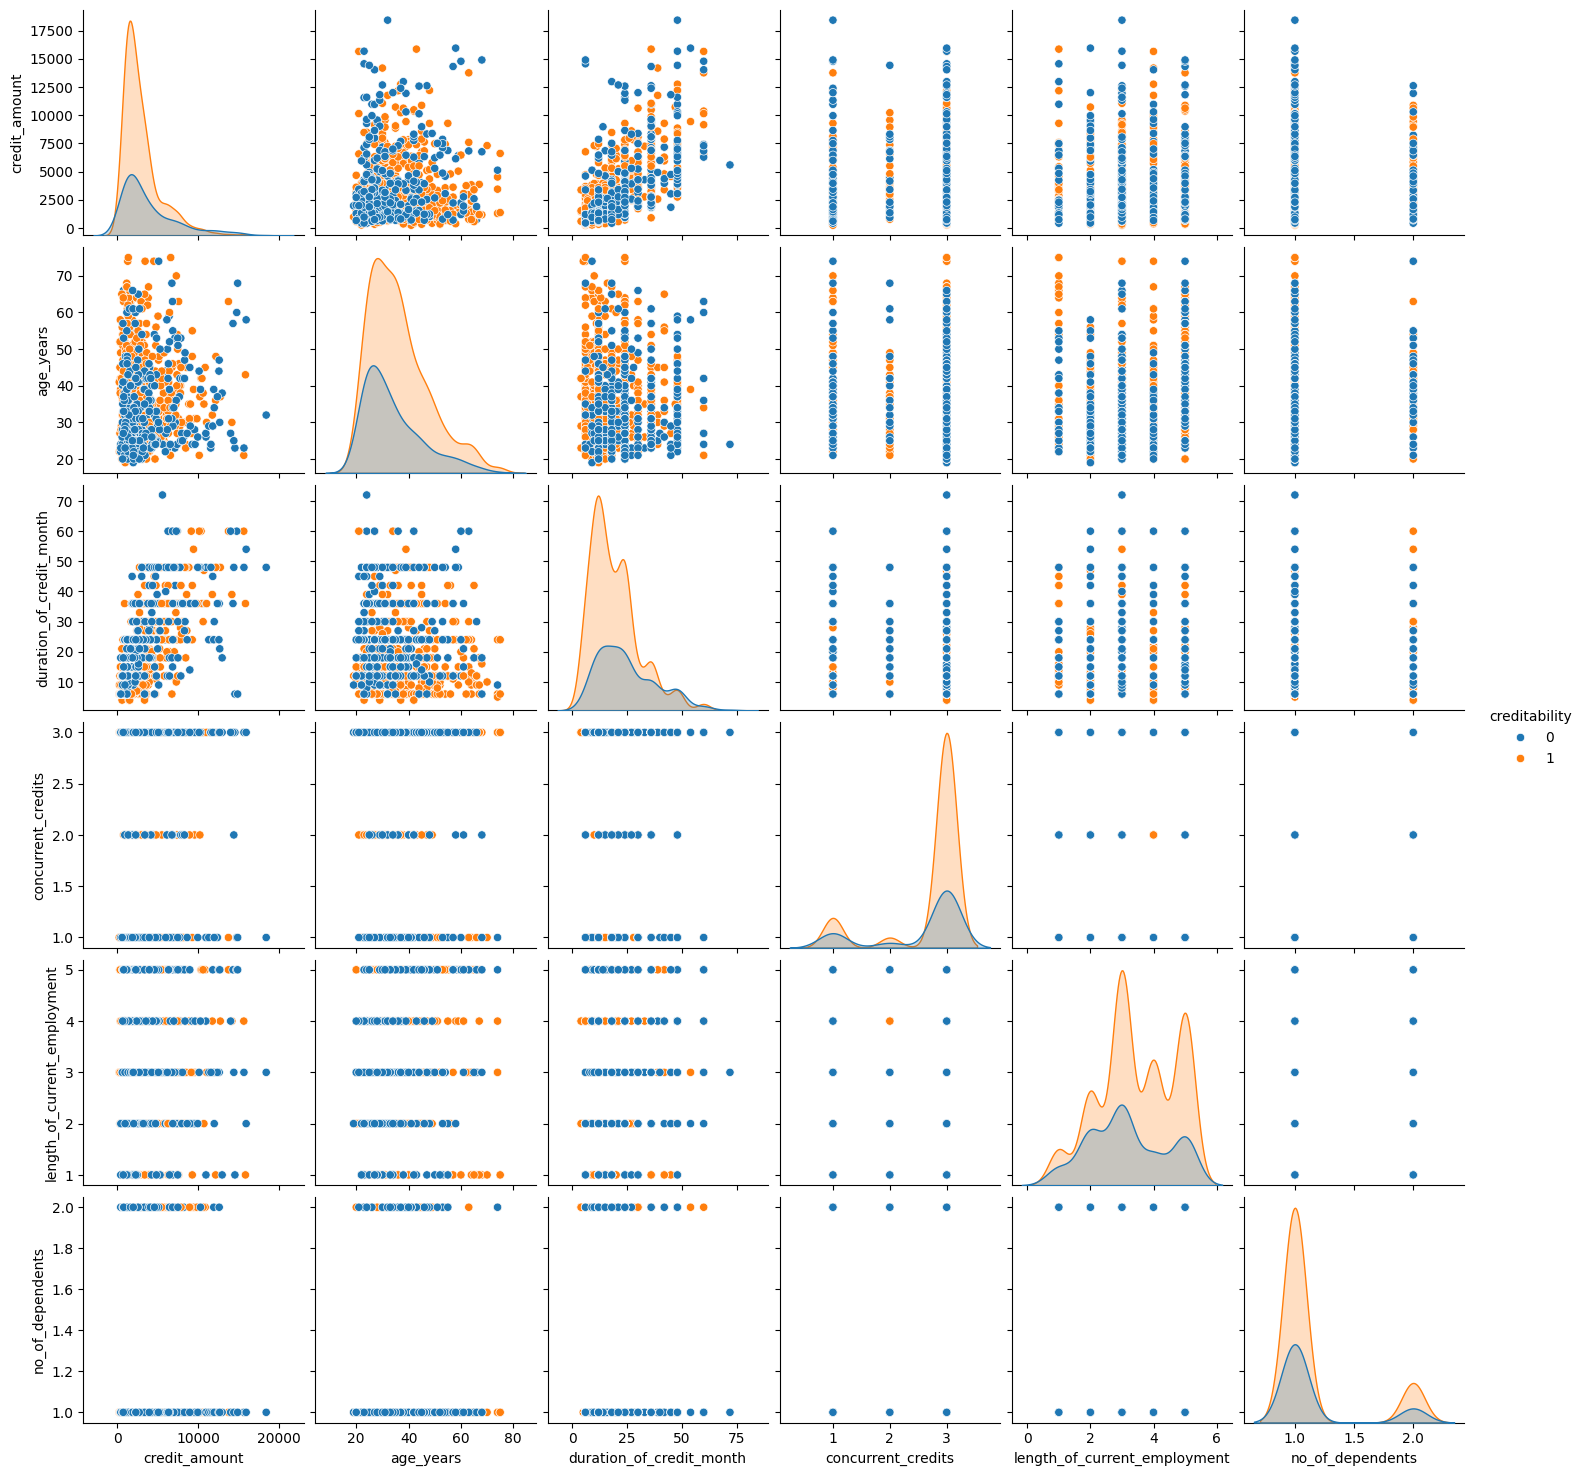

In [22]:
# analise de separabilide linear (visual)
sns.pairplot(data, hue='creditability')

Aparentemente, nenhum das combinações 2 x 2 apresenta separabilidade linear. Mas não percamos as esperanças. Um conjunto de dados pode ser linearmente separável em *dimensões maiores*.

No entanto, nossa cognição é limita a enxergar em 3 dimensões.

Mesmo assim, vamos partir para as etapas de modelagem. Mas primeiro, precisamos separar uma parte da base de dados para ser utilizada como teste. Por quê?

In [23]:
# separando x e y
x = data.drop(columns=['creditability'])
y = data[['creditability']]

In [25]:
# separação treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [27]:
# analise de proporções
props = pd.DataFrame(y.value_counts(normalize=True).values, columns=['original'])
props['train'] = y_train.value_counts(normalize=True).values
props['test'] = y_test.value_counts(normalize=True).values
props

original  train      test
0       0.7   0.71  0.676667
1       0.3   0.29  0.323333

In [28]:
# separação treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

props = pd.DataFrame(y.value_counts(normalize=True).values, columns=['original'])
props['train'] = y_train.value_counts(normalize=True).values
props['test'] = y_test.value_counts(normalize=True).values
props

original  train  test
0       0.7    0.7   0.7
1       0.3    0.3   0.3

Agora nossas amostras de treinamento e teste são representativas e podemos prosseguir com nossa análise.

Sempre que formos construir um modelos, precisamos estabelecer uma referência, ou seja, precisamos ter uma base para comparação dos desempenhos. Isso é conhecido como comparação *baseline*.

No nosso estudo, nosso baseline será um modelo totalmente enviesado que prevê que todos os clientes, independente de suas características, terão credibilidade.

In [30]:
# criar um modelo baseline - hipótese: todos merecem crédito (todos = 1)
y_base = np.repeat(1, repeats=y_test.shape[0])
y_base

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
# métricas do baseline
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.70      1.00      0.82       210

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300



In [32]:
# criar um primeiro modelo de regressão Logística
rl1 = LogisticRegression(penalty=None).fit(x_train, y_train)

# fazendo a previsão do teste
yhat_rl1 = rl1.predict(x_test)

# analisando métricas
print(classification_report(y_test, yhat_rl1))

              precision    recall  f1-score   support

           0       0.42      0.12      0.19        90
           1       0.71      0.93      0.81       210

    accuracy                           0.69       300
   macro avg       0.57      0.53      0.50       300
weighted avg       0.63      0.69      0.62       300



In [33]:
# prevendo probabilidades
yhat_rl1_prob = rl1.predict_proba(x_test)
yhat_rl1_prob

array([[0.12735112, 0.87264888],
       [0.27803703, 0.72196297],
       [0.39187274, 0.60812726],
       [0.24168294, 0.75831706],
       [0.17906087, 0.82093913],
       [0.52646683, 0.47353317],
       [0.24855033, 0.75144967],
       [0.14410127, 0.85589873],
       [0.37624844, 0.62375156],
       [0.38395789, 0.61604211],
       [0.15086872, 0.84913128],
       [0.31731407, 0.68268593],
       [0.55377485, 0.44622515],
       [0.54832875, 0.45167125],
       [0.1914353 , 0.8085647 ],
       [0.20149814, 0.79850186],
       [0.34182242, 0.65817758],
       [0.22630231, 0.77369769],
       [0.25579982, 0.74420018],
       [0.1908611 , 0.8091389 ],
       [0.14363101, 0.85636899],
       [0.33832602, 0.66167398],
       [0.19704905, 0.80295095],
       [0.18852615, 0.81147385],
       [0.23728256, 0.76271744],
       [0.35421212, 0.64578788],
       [0.15711895, 0.84288105],
       [0.27384504, 0.72615496],
       [0.32130249, 0.67869751],
       [0.45644755, 0.54355245],
       [0.

- Repetir toda a análise feita para o German Credit, porém para o Drug200 (drugC = 1, o resto = 0)

Por ser um modelo baseado em combinações lineares, o modelo de regressão logística é facilmente *enviesado* pelas amplitudes de variação dos atributos de entrada. Atributos com amplitudes muito diferentes podem enviesar os coeficientes do modelo e torná-lo instável.

Vamos conhecer uma técnica interessante para manter passos de pré-processamento unidos num único objeto.

Também podemos incorporar conhecimentos específicos do negócio para avaliar nossos modelos. Vamos supor as seguintes situações:

- **Cliente credível previsto como credível (TP)**: + 50.00
- **Cliente credível previsto como não credível (FN)**: -5.00
- **Cliente não credível previsto como não credível (TN)**: - 5.00
- **Cliente não credível previsto como credível (FP)**: - 150.00

Finalmente, supondo que escolhemos o último modelo como nosso modelo final, podemos usá-lo para explicar decisões de negócio para pessoas não técnicas. Façamos uma análise de importância de atributos.

$$p(Y=1|X) = \frac{e^{a_0+\sum_{i=1}^{m}a_ix_i}}{1+e^{a_0+\sum_{i=1}^{m}a_ix_i}}$$